In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/DataV6

/content/drive/My Drive/DataV6


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from imutils import paths
from sklearn.utils import shuffle
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [ ]:
batch_size = 32
target_size = (224, 224)
labels = {'glass': 0, 'plastic': 2,'paper': 1}



#TRAIN
train_path =  'train'

x_train = []
train_labels = []

train_imagePaths = sorted(list(paths.list_images(train_path)))
for imagePath in train_imagePaths:
    img = cv2.imread(imagePath)
    img = cv2.resize(img, target_size)
    x_train.append(img)

    
    label = imagePath.split(os.path.sep)[-2]
    if label!='.ipynb_checkpoints':
        train_labels.append(labels[label])
        
x_train, train_labels = shuffle(x_train, train_labels)

print("len x_train", len(x_train))
print("x_train[0] shape", x_train[0].shape)
print("len train_labels", len(train_labels))

x_train = np.array(x_train, dtype="float") / 255.0
train_labels = np.array(train_labels)


#TEST
test_path = 'test'

x_test = []
test_labels = []


test_imagePaths = sorted(list(paths.list_images(test_path)))
for imagePath in test_imagePaths:
    img = cv2.imread(imagePath)
    img = cv2.resize(img, target_size)
    x_test.append(img)

    
    label = imagePath.split(os.path.sep)[-2]
    if label!='.ipynb_checkpoints':
        test_labels.append(labels[label])


x_test , test_labels = shuffle(x_test, test_labels)

print("len x_test", len(x_test))
print("x_test[0] shape", x_test[0].shape)
print("len test_labels", len(test_labels))

x_test = np.array(x_test, dtype="float") / 255.0
test_labels = np.array(test_labels)



########################################################################

len x_train 2487
x_train[0] shape (224, 224, 3)
len train_labels 2487
len x_test 624
x_test[0] shape (224, 224, 3)
len test_labels 624


In [ ]:
num_classes = 3
y_train = tf.keras.utils.to_categorical(train_labels, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(test_labels, num_classes=num_classes)

In [ ]:
from keras.applications.vgg16 import VGG16
IMAGE_SIZE = [224,224]


vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg.layers.pop()


for layer in vgg.layers:
    layer.trainable = False


x = tf.keras.layers.Flatten()(vgg.output)
prediction = tf.keras.layers.Dense(3, activation='softmax')(x)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=.00015), loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=32,verbose=1)
%cd /content/drive/My Drive/DataV6Training
model.save('RECYCLEDataV6IkinciEgitim.h5')

Epoch 1/40
78/78 [==============================] - 32s 241ms/step - loss: 0.8052 - accuracy: 0.6413 - val_loss: 0.6281 - val_accuracy: 0.7580
Epoch 2/40
78/78 [==============================] - 15s 189ms/step - loss: 0.4966 - accuracy: 0.8363 - val_loss: 0.5131 - val_accuracy: 0.8077
Epoch 3/40
78/78 [==============================] - 15s 195ms/step - loss: 0.3975 - accuracy: 0.8721 - val_loss: 0.4331 - val_accuracy: 0.8654
Epoch 4/40
78/78 [==============================] - 16s 201ms/step - loss: 0.3213 - accuracy: 0.9067 - val_loss: 0.4261 - val_accuracy: 0.8317
Epoch 5/40
78/78 [==============================] - 16s 204ms/step - loss: 0.2839 - accuracy: 0.9244 - val_loss: 0.3779 - val_accuracy: 0.8638
Epoch 6/40
78/78 [==============================] - 17s 213ms/step - loss: 0.2453 - accuracy: 0.9433 - val_loss: 0.3594 - val_accuracy: 0.8558
Epoch 7/40
78/78 [==============================] - 17s 213ms/step - loss: 0.2163 - accuracy: 0.9566 - val_loss: 0.3361 - val_accuracy: 0.8862

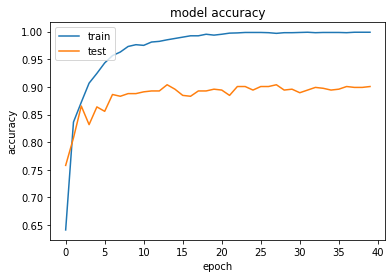

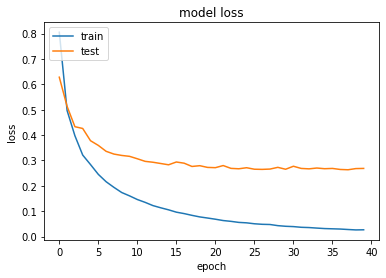

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

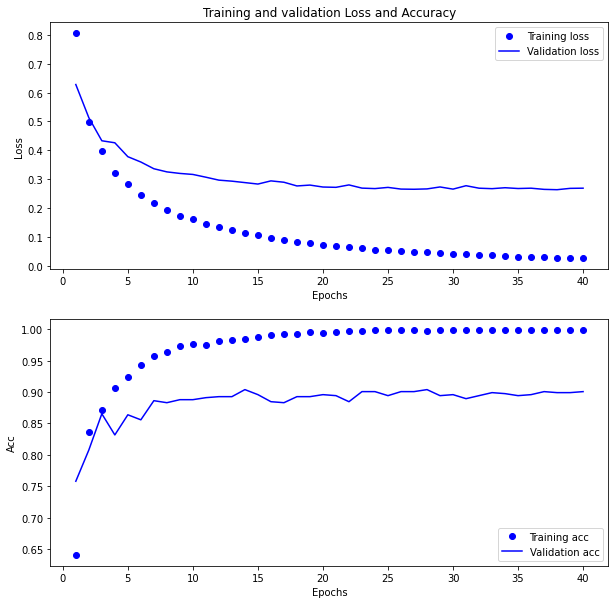

In [ ]:
#VGG7

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

20/20 [==============================] - 3s 161ms/step - loss: 0.2687 - accuracy: 0.9006
Test Loss: 0.2687302529811859
Test accuracy: 0.9006410241127014


In [ ]:
y_pred = model.predict(x_test) 
y_pred = np.argmax(y_pred, axis=1)
y_true =np.argmax(y_test, axis=1)

target_names = ["glass","paper", "plastic"]

cm = confusion_matrix(y_true, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print(cm)


print(classification_report(y_true, y_pred, target_names=target_names)) 

[[178   1  28]
 [  2 213   6]
 [ 16   9 171]]
              precision    recall  f1-score   support

       glass       0.91      0.86      0.88       207
       paper       0.96      0.96      0.96       221
     plastic       0.83      0.87      0.85       196

    accuracy                           0.90       624
   macro avg       0.90      0.90      0.90       624
weighted avg       0.90      0.90      0.90       624

